# 《最強行銷武器—整合行銷研究與資料科學》

## `行銷定價新型態：即時動態定價策略與實做Python程式碼(1) - 行銷資料科學 - 機器學習`

本程式碼步驟將遵循我們出版的《最強行銷武器—整合行銷研究與資料科學》一書中提供的KDD程序進行實作，以線上銷售平台的銷售資料結合機器學習模型預測，引導讀者們瞭解具體分析過程與效果。

此次分析所使用的資料來自日本知名的網路二手交易平台「Mercari」。該平台提供一個開放的交易環境，讓使用者可以自由地在平台上販售、選購各式各樣地產品。該app 僅在日本、美國就擁有了超過5,500 萬次的下載數量，潛力十分驚人。

歡迎下載[分析資料](https://drive.google.com/drive/u/1/folders/1X8EFrDs5Ah9baE3lLTkQdVVqfHFe83Yx)

# **KDD分析步驟**


## 步驟1 —決定目標（identifying the goal）

在平台中，商品的價格皆由賣方自由決定，所以讀者可以想像一下，有一位賣家想要出清自家球鞋，並將商品基本資訊，如：

1. 商品名稱—輕量避震籃球鞋
2. 商品狀態—8成新
3. 商品敘述—高級名牌球鞋！限時優惠！
4. 商品分類—球鞋
5. 商品品牌—好棒棒牌
6. 運費狀況—賣家付款

接著，賣家該如何為自己的球鞋訂價？如果這時，交易平台上突然跳出一則系統訊息：「根據市場行情與買家心目中理想價格預測，本款球鞋建議售價10 ~15美元之間！」，如圖1所示：

![](https://imgur.com/3Wup8yX.png)
圖1. Mercari網拍平台、賣家與賣家的情境

此時，賣家可能會受到系統訊息的影響，不斷地想著：「這一批球鞋已經接近生命週期的尾端，不如趕快出清，就用系統建議價格賣掉好了。」接著，該賣家就依系統的建議，給出定價，並且順利賣出，如圖2所示。

![](https://imgur.com/QsDWHBO.png)
圖2. 動態定價的目標情境示意圖

現在，請各位回想一下，這個「動態定價」機制背後，究竟隱含什麼樣的功能？它可以讓拍賣平台達成何種目標？

- 目標 1：以往的拍賣價格經常由網拍平台片面決定，時常造成最終售價與賣家出現大幅心理落差。而此種作法則有所不同，賣家在輸入商品相關資訊時，網拍平台就給予一個買家心目中的建議動態定價，並讓賣家可以掌握標價的最終決定權，如圖2中的數字1. 所示。

- 目標 2：電商平台提供賣家商品建議價格，可以有效縮短賣家定價猶豫的時間，提昇上架的速度，同時讓買家更快成交，如圖2 中的數字2. 與3. 所示。

- 目標 3：網拍平台掌握不同商品的動態定價，依據時間週期調整商品供需，利用機器學習模型與搭配損失函數，來誘導賣家訂出「不割喉式競爭」的價格，讓買家可以快速在網拍平台上成交，如圖2中的數字4. 所示。

## 步驟2 —建立目標資料集（creating a target data set）

選擇一個我們有興趣，或想深入探索的資料集來執行運算和分析。
在此使用爬蟲技術，將下述的多個拍賣項目給爬取下來，如圖3 所示。

![](https://imgur.com/6WZA7ai.png)
圖3. 賣家在Mercari網拍平台上架的手機商品

讀者可以看到畫面中有「結構化」資料，如：Price 與Shipping 為數值形式的資料；以及「非結構化」資料，如：brand、category 等文字形式資料。這意味著我們在後續執行預測任務時，會與以往僅有數值形態的傳統銷售資料之處理與建模方法有所不同。

![](https://imgur.com/Bhk3ATc.png)

此外，本案爬取的商品特別以「已售出」為主，原因在於已售出代表買賣雙方同意的成交價格，若以此建立模型，可為賣家後續要出售的商品來建立買家心目中理想價格，藉此提高商品成交效率，並正面影響網拍平台、賣家的最終利潤。

本案資料筆數，約有148 萬筆交易資料，圖4 為八個欄位的資料集預覽圖：

![](https://imgur.com/V30IC19.png)
圖4. 資料集預覽圖

## 步驟3.－資料清理與前置處理（data cleaning and preprocessing）

In [19]:
pip install numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\howar\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [20]:
pip install tensorflow-gpu

You should consider upgrading via the 'C:\Users\howar\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.



In [21]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\howar\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [22]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\howar\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [23]:
# ANN model package
from tensorflow.python.client import device_lib

# I'm using gpu
print(device_lib.list_local_devices())
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten, Activation
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
# from keras.layers import Bidirectional

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10831807422552572829
]


## import tree based model - XGBoost and Random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
import lightgbm as lgb

## import ElasticNet

In [25]:
from sklearn.linear_model import ElasticNet

## import data preprocessing tools

In [26]:
# nlp
from nltk.corpus import stopwords
import math
from datetime import datetime 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# set seed
np.random.seed(123)


In [27]:
train_df = pd.read_table('train_data.tsv')
test_df = pd.read_table('test_data.tsv')
print(train_df.shape, test_df.shape)

(1186028, 9) (296507, 9)


In [28]:
train_df

,Unnamed: 0,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,16705,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners
1,1243613,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0
2,225004,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...
3,583451,583451,Hand Turned Pens,1,Other/Office supplies/Writing,NaN,50.0,1,Reserved for Gail
4,983127,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I..."
...,...,...,...,...,...,...,...,...,...
1186023,1241052,1241052,Urban Decay Naked Skin Foundation,3,Beauty/Makeup/Makeup Palettes,NaN,15.0,1,"About 80% or more full, no lid. Shade 2.0. Loo..."
1186024,1066306,1066306,VS LOVE SPELL MIST,1,Beauty/Fragrance/Women,Victoria's Secret,13.0,0,Brand new 8.4 fl oz
1186025,28030,28030,F21 Floral Sweatshirt,2,Women/Sweaters/Crewneck,FOREVER 21,14.0,0,I'm not sure if my daughter ever wore this. It...
1186026,277869,277869,Necklace pearl stones,1,Women/Jewelry/Necklaces,NaN,23.0,0,"jewelry necklace, Biwa Pearl Stones, 19.5 inch..."


In [29]:
del train_df['Unnamed: 0']

In [30]:
del test_df['Unnamed: 0']

In [31]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,NaN,50.0,1,Reserved for Gail
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I..."
...,...,...,...,...,...,...,...,...
1186023,1241052,Urban Decay Naked Skin Foundation,3,Beauty/Makeup/Makeup Palettes,NaN,15.0,1,"About 80% or more full, no lid. Shade 2.0. Loo..."
1186024,1066306,VS LOVE SPELL MIST,1,Beauty/Fragrance/Women,Victoria's Secret,13.0,0,Brand new 8.4 fl oz
1186025,28030,F21 Floral Sweatshirt,2,Women/Sweaters/Crewneck,FOREVER 21,14.0,0,I'm not sure if my daughter ever wore this. It...
1186026,277869,Necklace pearl stones,1,Women/Jewelry/Necklaces,NaN,23.0,0,"jewelry necklace, Biwa Pearl Stones, 19.5 inch..."


### 資料前處理

### Remove low prices
Mercari does not allow postings below 3 so below that is an error. Removing them helps models well-analyze the data.

In [32]:
# remove low prices from training data
train_df = train_df.drop(train_df[(train_df.price < 3.0)].index)
train_df.shape

(1185327, 8)

In [33]:
# remove low prices from testing data
test_df = test_df.drop(test_df[(test_df.price < 3.0)].index)
test_df.shape

(296334, 8)

In [34]:
train_df.shape[0] + test_df.shape[0]

1481661

### Remove high prices
Mercari also does not allow postings over 2000. Could get rid of those, but only 3 and they are only a few dollars higher so that is probably just shipping fees.

In [35]:
train_df = train_df.drop(train_df[(train_df.price > 2000)].index)
train_df.shape

(1185324, 8)

In [36]:
# remove low prices from testing data
test_df = test_df.drop(test_df[(test_df.price > 2000)].index)
test_df.shape

(296334, 8)

In [37]:
# 如果後面train_df與test_df太大，可以隨機抓取50000筆來測試
#train_df = train_df.sample(50000, replace=True)
#test_df=test_df.sample(50000,replace=True)

### 計算 item description 與 name的長度
可以使用本欄位來嘗試看看對Y有無影響

In [38]:

# get name and description lengths
def wordCount(text):
    try:
        if text == 'No description yet':
            return 0
        else:
            text = text.lower()
            words = [w for w in text.split(" ")]
            return len(words)
    except: 
        return 0


In [39]:
train_df['desc_len'] = train_df['item_description'].apply(lambda x: wordCount(x))
test_df['desc_len'] = test_df['item_description'].apply(lambda x: wordCount(x))

train_df['name_len'] = train_df['name'].apply(lambda x: wordCount(x))
test_df['name_len'] = test_df['name'].apply(lambda x: wordCount(x))

train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners,2,6
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0,2,3
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,NaN,50.0,1,Reserved for Gail,3,3
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3


### 類別資料處理


In [40]:
train_df['category_name'][0:10]

0              Vintage & Collectibles/Toy/Car
1               Women/Athletic Apparel/Shorts
2             Women/Tops & Blouses/Tank, Cami
3               Other/Office supplies/Writing
4          Women/Athletic Apparel/Sports Bras
5                        Women/Shoes/Athletic
6             Women/Women's Accessories/Belts
7                           Men/Tops/T-shirts
8    Electronics/Video Games & Consoles/Games
9               Kids/Toys/Dolls & Accessories
Name: category_name, dtype: object

In [41]:

# split category name into 3 parts
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")
    

In [42]:
train_df['subcat_0'], train_df['subcat_1'], train_df['subcat_2'] = zip(*train_df['category_name'].apply(lambda x: split_cat(x)))

test_df['subcat_0'], test_df['subcat_1'], test_df['subcat_2'] = zip(*test_df['category_name'].apply(lambda x: split_cat(x)))

In [43]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners,2,6,Vintage & Collectibles,Toy,Car
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0,2,3,Women,Athletic Apparel,Shorts
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6,Women,Tops & Blouses,"Tank, Cami"
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,NaN,50.0,1,Reserved for Gail,3,3,Other,Office supplies,Writing
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3,Women,Athletic Apparel,Sports Bras
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186023,1241052,Urban Decay Naked Skin Foundation,3,Beauty/Makeup/Makeup Palettes,NaN,15.0,1,"About 80% or more full, no lid. Shade 2.0. Loo...",28,5,Beauty,Makeup,Makeup Palettes
1186024,1066306,VS LOVE SPELL MIST,1,Beauty/Fragrance/Women,Victoria's Secret,13.0,0,Brand new 8.4 fl oz,5,4,Beauty,Fragrance,Women
1186025,28030,F21 Floral Sweatshirt,2,Women/Sweaters/Crewneck,FOREVER 21,14.0,0,I'm not sure if my daughter ever wore this. It...,13,3,Women,Sweaters,Crewneck
1186026,277869,Necklace pearl stones,1,Women/Jewelry/Necklaces,NaN,23.0,0,"jewelry necklace, Biwa Pearl Stones, 19.5 inch...",20,3,Women,Jewelry,Necklaces


In [44]:
test_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2
0,933947,On hold for Chelseychu,2,Women/Women's Handbags/Shoulder Bag,Hello Kitty,31.0,0,Black faux leather hello kitty satchel comes w...,16,4,Women,Women's Handbags,Shoulder Bag
1,236612,Lace up leggings,2,Women/Pants/Casual Pants,NaN,15.0,1,Only worn for picture,4,3,Women,Pants,Casual Pants
2,832246,Zipper High Top All Star Converse,3,Women/Shoes/Fashion Sneakers,Converse,26.0,0,Size 7 women's Great for your feet! Check out ...,18,6,Women,Shoes,Fashion Sneakers
3,343557,Sperry,3,Kids/Girls 2T-5T/Shoes,NaN,16.0,0,Pink Size 6 toddler Used Very good condition G...,9,1,Kids,Girls 2T-5T,Shoes
4,1227445,Lipsense set,1,Beauty/Makeup/Lips,SeneGence,50.0,1,Bella color with Glossy gloss and oops remover,8,2,Beauty,Makeup,Lips
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296502,430921,Hatchimals,1,Kids/Toys/Stuffed Animals & Plush,NaN,161.0,0,Hatchimals Hatchimals Penguala pink/yellow new...,20,1,Kids,Toys,Stuffed Animals & Plush
296503,1140387,Men's Medium Beige Columbia Sweatshirt,3,"Men/Sweats & Hoodies/Sweatshirt, Pullover",Columbia,14.0,0,Men's medium beige Columbia sweatshirt - soft ...,8,5,Men,Sweats & Hoodies,"Sweatshirt, Pullover"
296504,1469474,Tommy Hilfiger T,3,Women/Tops & Blouses/T-Shirts,Tommy Hilfiger,14.0,0,"Small yellow spot next to tag, not noticeable ...",17,3,Women,Tops & Blouses,T-Shirts
296505,195866,Womens Stretchy Plus Size Dress Sz 2XL,1,Women/Dresses/Knee-Length,NaN,16.0,0,Womens Plus Size Dress Size 2XL New With Tags ...,86,7,Women,Dresses,Knee-Length


### 遺失值處理 
在遺失值處理中，發現「品牌名稱」（brand_name）欄位中的50萬筆遺失值資料中，有不少交易資料意外將品牌名稱放在「商品名稱」（name）欄位中，例如：一個品牌名稱Yeti，許多賣家在商品名稱中有特別說明，但是在品牌名稱卻未標明。因此我們將隱藏在「商品名稱」中的「品牌名稱」找出來，大約可找回20%的遺失資料，共約10萬筆的品牌名稱。

In [45]:
# we can see a lot of NA stored in brand name col
train_df['brand_name']

0                 Hot Wheels
1             Lilly Pulitzer
2           American Apparel
3                        NaN
4                       Nike
                 ...        
1186023                  NaN
1186024    Victoria's Secret
1186025           FOREVER 21
1186026                  NaN
1186027                  NaN
Name: brand_name, Length: 1185324, dtype: object

In [46]:
# attempt to find missing brand names
full_set = pd.concat([train_df,test_df])


In [47]:
full_set.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners,2,6,Vintage & Collectibles,Toy,Car
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0,2,3,Women,Athletic Apparel,Shorts
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6,Women,Tops & Blouses,"Tank, Cami"
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,NaN,50.0,1,Reserved for Gail,3,3,Other,Office supplies,Writing
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3,Women,Athletic Apparel,Sports Bras


In [48]:
# full_set[full_set['brand_name']. ]

In [49]:
all_brands = set(full_set['brand_name'].values)
train_df.brand_name.fillna(value="missing", inplace=True)
test_df.brand_name.fillna(value="missing", inplace=True)


In [50]:
a = train_df.loc[train_df['brand_name'] == 'missing']

In [51]:
a

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,missing,50.0,1,Reserved for Gail,3,3,Other,Office supplies,Writing
6,354393,New!! 4 leopard belt bundle,1,Women/Women's Accessories/Belts,missing,12.0,0,"New!! Green, blue, yellow and pink Leopard Bel...",13,5,Women,Women's Accessories,Belts
7,591457,Men's tie dye cat shirt,3,Men/Tops/T-shirts,missing,9.0,0,Gently worn and washed.,4,5,Men,Tops,T-shirts
12,605329,Urban Decay Body Powder,2,Beauty/Skin Care/Body,missing,15.0,0,Urban Decay Marshmallow Body Powder... NWOT. O...,10,4,Beauty,Skin Care,Body
13,766849,Wen by Chaz Dean straightening gloss,1,Beauty/Hair Care/Styling Products,missing,12.0,0,1 oz sweet almond mint,5,6,Beauty,Hair Care,Styling Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186020,1094779,Rae Dunn Mom and Dad Mug Set,1,Home/Kitchen & Dining/Coffee & Tea Accessories,missing,24.0,0,Brand new.,2,7,Home,Kitchen & Dining,Coffee & Tea Accessories
1186022,194278,NEW WOMEN GIRLS BIKINI COVER-UP WRAP,1,Women/Other/Other,missing,10.0,1,NEW WOMEN GIRLS BIKINI COVER-UP WRAPSUMMER BEA...,82,6,Women,Other,Other
1186023,1241052,Urban Decay Naked Skin Foundation,3,Beauty/Makeup/Makeup Palettes,missing,15.0,1,"About 80% or more full, no lid. Shade 2.0. Loo...",28,5,Beauty,Makeup,Makeup Palettes
1186026,277869,Necklace pearl stones,1,Women/Jewelry/Necklaces,missing,23.0,0,"jewelry necklace, Biwa Pearl Stones, 19.5 inch...",20,3,Women,Jewelry,Necklaces


In [52]:
# finding function
premissing = len(train_df.loc[train_df['brand_name'] == 'missing'])
def brandfinder(line):
    brand = line[0] # brand_name的意思
    name = line[1] # name的意思
    namesplit = name.split(' ')

    # 如果brand本身就是missing的話，我們就到name的每一個單字（namesplit）裡面去找啦！
    # 然後若namesplit裡面的單字有在all_brands裡面的話，那太棒的，就將missing補齊
    if brand == 'missing':
        for x in namesplit:
            if x in all_brands:
                print(x)
                return name
    if name in all_brands:
        return name
    return brand

這樣在missing brand裡面至少有接近13萬的brand被找到！

In [53]:

train_df['brand_name'] = train_df[['brand_name','name']].apply(brandfinder, axis = 1)
test_df['brand_name'] = test_df[['brand_name','name']].apply(brandfinder, axis = 1)
found = premissing-len(train_df.loc[train_df['brand_name'] == 'missing'])

print(found)

e
Chanel
Kangol
Yeti
Proactiv
PINK
Lush
Thrive
Diamond
Bape
Nike
Converse
Boden
Vintage
Cottonelle
Sangean
Jordan
Magazine
Vintage
LuLaRoe
Disney
Ring
Adidas
Murad
Vintage
Ban
Pro
Diamond
Boots
Lot
GoPro
Velvet
MCM
Jordan
Apple
Avery
Jordan
LuLaRoe
Dragon
Vanity
Vintage
Butterfly
Jordan
Colourpop
Cake
Avery
Blowfish
Justin
Fox
Scentsy
Batman
Vintage
PINK
AND
Ring
Pokemon
Blind
Butterfly
Boots
Manga
Marvel
Clarisonic
Younique
Level
Fabletics
Chic
LuLaRoe
Starter
Velvet
Apple
Fitbit
Gucci
Obey
Dansko
Swarovski
Galaxy
Secret
Drake
Boots
Samsung
Lush
Sperry
H&M
Coach
Milani
Philosophy
Eyeshadow
M
Lot
Philosophy
Logitech
LuLaRoe
Prada
Essie
Jordan
Gypsy
Essie
Samsung
Apple
Pokemon
LuLaRoe
Infinity
Blush
Sperry
Disney
Gymboree
Proactiv
Blush
Ninja
Monster
Coach
Coach
Essie
Lot
Nars
Yeti
Arrow
M
Vintage
Melissa
Blowfish
Supreme
Coach
OPI
Silver
X
Disney
Disney
Younique
Aeropostale
LuLaRoe
Disney
Ring
Lee
Silver
Jamberry
Chicago
Jordans
Chicago
All
Speck
Ring
Batman
Vintage
Smashbox
M
Lush
Dis

In [54]:
# 減少多少missing
print(found)

103026


In [55]:
# 原本的missing brand name
premissing

505654

In [56]:
# 至少20%被找回了啦！
found / premissing

0.20374801741902565

### 目標變數的資料處理─售價（Price）
本案的交易資料中，若干資料的售價過高或過低，超出平台的訂價限制範圍，因此必須將它們從分析資料中加以剔除。此外，注意到資料的「售價」有嚴重的右偏分佈情形，如圖7.的左圖所示，這對於我們之後從高斯分配所延伸出來的機器學習模型來說，不容易達到較佳的預測效果，因此我們透過log轉換處理，讓它可更加接近常態分佈，如圖7.的右圖所示，提升預測成效。

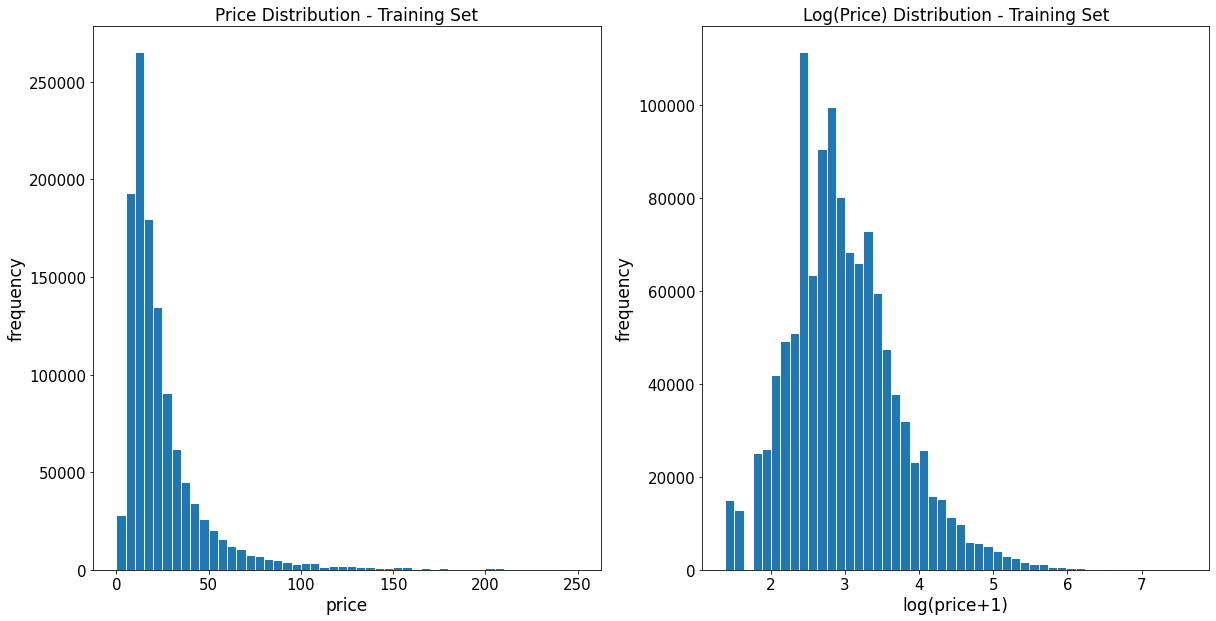

In [57]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
(train_df['price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250])
plt.xlabel('price', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)

plt.subplot(1, 2, 2)
np.log(train_df['price']+1).plot.hist(bins=50, figsize=(20,10), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Log(Price) Distribution - Training Set', fontsize=17)
plt.show()

In [58]:
# Scale target variable to log.
train_df["target"] = np.log1p(train_df.price)
test_df["target"] = np.log1p(test_df.price)

# Calculate number of train/dev/test examples.
n_trains = train_df.shape[0]
n_tests = test_df.shape[0]
print("Training on", n_trains, "examples")
print("Testing on", n_tests, "examples")

Training on 1185324 examples
Testing on 296334 examples


In [59]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2,target
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners,2,6,Vintage & Collectibles,Toy,Car,1.945910
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0,2,3,Women,Athletic Apparel,Shorts,3.044522
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6,Women,Tops & Blouses,"Tank, Cami",2.397895
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,missing,50.0,1,Reserved for Gail,3,3,Other,Office supplies,Writing,3.931826
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3,Women,Athletic Apparel,Sports Bras,2.397895


### 類別資料處理─以商品分類為例

In [60]:
# Concatenate train - dev - test data for easy to handle
full_df = pd.concat([train_df, test_df])

In [61]:
# Filling missing values
def fill_missing_values(df):
    df.category_name.fillna(value="missing", inplace=True)
    df.brand_name.fillna(value="missing", inplace=True)
    df.item_description.fillna(value="missing", inplace=True)
    df.item_description.replace('No description yet',"missing", inplace=True)
    return df

print("Filling missing data...")
full_df = fill_missing_values(full_df)
print(full_df.category_name[1])

Filling missing data...
1    Women/Athletic Apparel/Shorts
1         Women/Pants/Casual Pants
Name: category_name, dtype: object


## Process categorical data

In [62]:
full_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2,target
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,Hot Wheels,6.0,1,Soft corners,2,6,Vintage & Collectibles,Toy,Car,1.945910
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,Lilly Pulitzer,20.0,0,Size 0,2,3,Women,Athletic Apparel,Shorts,3.044522
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",American Apparel,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6,Women,Tops & Blouses,"Tank, Cami",2.397895
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,missing,50.0,1,Reserved for Gail,3,3,Other,Office supplies,Writing,3.931826
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,Nike,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3,Women,Athletic Apparel,Sports Bras,2.397895


In [63]:

print("Processing categorical data...")
le = LabelEncoder()
# full_df.category = full_df.category_name
le.fit(full_df.category_name)
full_df['category'] = le.transform(full_df.category_name)

le.fit(full_df.brand_name)
full_df.brand_name = le.transform(full_df.brand_name)

le.fit(full_df.subcat_0)
full_df.subcat_0 = le.transform(full_df.subcat_0)

le.fit(full_df.subcat_1)
full_df.subcat_1 = le.transform(full_df.subcat_1)

le.fit(full_df.subcat_2)
full_df.subcat_2 = le.transform(full_df.subcat_2)

del le

Processing categorical data...


In [64]:
full_df.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2,target,category
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,46910,6.0,1,Soft corners,2,6,9,105,154,1.945910,1117
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,55465,20.0,0,Size 0,2,3,10,5,695,3.044522,1139
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",9639,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6,10,104,767,2.397895,1261
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,117795,50.0,1,Reserved for Gail,3,3,7,72,866,3.931826,878
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,76424,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3,10,5,723,2.397895,1143


In [65]:
full_df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    60152
Women/Tops & Blouses/T-Shirts                     46349
Beauty/Makeup/Face                                34320
Beauty/Makeup/Lips                                29901
Electronics/Video Games & Consoles/Games          26547
                                                  ...  
Handmade/Jewelry/Clothing                             1
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Accessories/Belt                             1
Handmade/Knitting/Scarf                               1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1288, dtype: int64

## Process text data


In [66]:

print("Transforming text data to sequences...")
raw_text = np.hstack([full_df.item_description.str.lower(), full_df.name.str.lower(), full_df.category_name.str.lower()])

print("   Fitting tokenizer...")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)

print("   Transforming text to sequences...")
full_df['seq_item_description'] = tok_raw.texts_to_sequences(full_df.item_description.str.lower())
full_df['seq_name'] = tok_raw.texts_to_sequences(full_df.name.str.lower())
# full_df['seq_category'] = tok_raw.texts_to_sequences(full_df.category_name.str.lower())

del tok_raw

Transforming text data to sequences...
   Fitting tokenizer...
   Transforming text to sequences...


In [67]:
raw_text[0:1]

array(['soft corners'], dtype=object)

## 步驟4：資料轉換（data transformation）

In [68]:
full_df.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2,target,category,seq_item_description,seq_name
0,16705,Hot wheels f&f nissan skyline gt-r,1,Vintage & Collectibles/Toy/Car,46910,6.0,1,Soft corners,2,6,9,105,154,1.945910,1117,"[176, 2595]","[420, 3054, 1676, 1676, 18769, 13288, 11508, 1..."
1,1243613,Summer haze callahans,3,Women/Athletic Apparel/Shorts,55465,20.0,0,Size 0,2,3,10,5,695,3.044522,1139,"[7, 132]","[529, 9298, 25482]"
2,225004,American Apparel Long Sleeve Bodysuit M,1,"Women/Tops & Blouses/Tank, Cami",9639,10.0,1,American Apparel Cotton Spandex Jersey Contras...,24,6,10,104,767,2.397895,1261,"[260, 56, 351, 678, 709, 5368, 708, 1453, 1754...","[260, 56, 144, 240, 1453, 163]"
3,583451,Hand Turned Pens,1,Other/Office supplies/Writing,117795,50.0,1,Reserved for Gail,3,3,7,72,866,3.931826,878,"[516, 4, 24861]","[483, 4830, 2569]"
4,983127,Nike sports bra,3,Women/Athletic Apparel/Sports Bras,76424,10.0,0,"Neon sports bra. Wear a handful of time, but I...",69,3,10,5,723,2.397895,1143,"[1152, 151, 189, 140, 5, 1371, 12, 237, 49, 15...","[110, 151, 189]"


### 非結構化資料處理─類神經模型的處理

In [69]:
MAX_NAME_SEQ = 10 #17
MAX_ITEM_DESC_SEQ = 75 #269
MAX_CATEGORY_SEQ = 8 #8

MAX_TEXT = np.max([
    np.max(full_df.seq_name.max()),
    np.max(full_df.seq_item_description.max()),
#     np.max(full_df.seq_category.max()),
]) + 100

MAX_CATEGORY = np.max(full_df.category.max()) + 1
MAX_BRAND = np.max(full_df.brand_name.max()) + 1
MAX_CONDITION = np.max(full_df.item_condition_id.max()) + 1
MAX_DESC_LEN = np.max(full_df.desc_len.max()) + 1
MAX_NAME_LEN = np.max(full_df.name_len.max()) + 1
MAX_SUBCAT_0 = np.max(full_df.subcat_0.max()) + 1
MAX_SUBCAT_1 = np.max(full_df.subcat_1.max()) + 1
MAX_SUBCAT_2 = np.max(full_df.subcat_2.max()) + 1

In [70]:
full_df.seq_name

0         [420, 3054, 1676, 1676, 18769, 13288, 11508, 1...
1                                        [529, 9298, 25482]
2                            [260, 56, 144, 240, 1453, 163]
3                                         [483, 4830, 2569]
4                                           [110, 151, 189]
                                ...                        
296502                                               [5282]
296503                            [143, 89, 773, 1766, 551]
296504                                     [1348, 1657, 71]
296505                    [768, 573, 160, 7, 96, 277, 1250]
296506                                     [6, 89, 849, 91]
Name: seq_name, Length: 1481658, dtype: object

In [71]:

def get_rnn_data(dataset):

    X = {
        'name': pad_sequences(dataset.seq_name, maxlen=MAX_NAME_SEQ),
        'item_desc': pad_sequences(dataset.seq_item_description, maxlen=MAX_ITEM_DESC_SEQ),
        'brand_name': np.array(dataset.brand_name),
        'category': np.array(dataset.category),
#         'category_name': pad_sequences(dataset.seq_category, maxlen=MAX_CATEGORY_SEQ),
        'item_condition': np.array(dataset.item_condition_id),
        'num_vars': np.array(dataset[["shipping"]]),
        'desc_len': np.array(dataset[["desc_len"]]),
        'name_len': np.array(dataset[["name_len"]]),
        'subcat_0': np.array(dataset.subcat_0),
        'subcat_1': np.array(dataset.subcat_1),
        'subcat_2': np.array(dataset.subcat_2),
    }
    return X


In [72]:

train = full_df[:n_trains]
test = full_df[n_trains:n_trains+n_tests]


In [73]:

X_train = get_rnn_data(train)
Y_train = train.target.values.reshape(-1, 1)

X_test = get_rnn_data(test)
Y_test = test.target.values.reshape(-1, 1)


In [74]:
len(X_test['name'][0])

10

In [75]:
test

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,desc_len,name_len,subcat_0,subcat_1,subcat_2,target,category,seq_item_description,seq_name
0,933947,On hold for Chelseychu,2,Women/Women's Handbags/Shoulder Bag,46005,31.0,0,Black faux leather hello kitty satchel comes w...,16,4,10,112,696,3.465736,1285,"[26, 693, 226, 1066, 1205, 1370, 126, 10, 144,...","[14, 261, 4, 250108]"
1,236612,Lace up leggings,2,Women/Pants/Casual Pants,117795,15.0,1,Only worn for picture,4,3,10,76,172,2.772589,1196,"[64, 36, 4, 263]","[243, 90, 54]"
2,832246,Zipper High Top All Star Converse,3,Women/Shoes/Fashion Sneakers,28095,26.0,0,Size 7 women's Great for your feet! Check out ...,18,6,10,88,306,3.295837,1205,"[7, 84, 58, 50, 4, 63, 1190, 171, 82, 42, 454,...","[480, 165, 74, 45, 559, 738]"
3,343557,Sperry,3,Kids/Girls 2T-5T/Shoes,97466,16.0,0,Pink Size 6 toddler Used Very good condition G...,9,1,4,47,693,2.833213,636,"[28, 7, 60, 439, 38, 88, 78, 17, 112]",[2408]
4,1227445,Lipsense set,1,Beauty/Makeup/Lips,92755,50.0,1,Bella color with Glossy gloss and oops remover,8,2,0,63,486,3.931826,28,"[3252, 61, 10, 2118, 662, 1, 5246, 1460]","[1186, 92]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296502,430921,Hatchimals,1,Kids/Toys/Stuffed Animals & Plush,117795,161.0,0,Hatchimals Hatchimals Penguala pink/yellow new...,20,1,4,106,745,5.087596,699,"[5282, 5282, 12537, 28, 422, 6, 8, 76, 46, 38,...",[5282]
296503,1140387,Men's Medium Beige Columbia Sweatshirt,3,"Men/Sweats & Hoodies/Sweatshirt, Pullover",27704,14.0,0,Men's medium beige Columbia sweatshirt - soft ...,8,5,5,98,756,2.708050,795,"[143, 89, 773, 1766, 551, 176, 351]","[143, 89, 773, 1766, 551]"
296504,1469474,Tommy Hilfiger T,3,Women/Tops & Blouses/T-Shirts,104285,14.0,0,"Small yellow spot next to tag, not noticeable ...",17,3,10,104,762,2.708050,1260,"[59, 422, 1493, 416, 9, 239, 51, 844, 279, 101...","[1348, 1657, 71]"
296505,195866,Womens Stretchy Plus Size Dress Sz 2XL,1,Women/Dresses/Knee-Length,117795,16.0,0,Womens Plus Size Dress Size 2XL New With Tags ...,86,7,10,35,461,2.833213,1164,"[768, 160, 7, 96, 7, 1250, 6, 10, 80, 179, 11,...","[768, 573, 160, 7, 96, 277, 1250]"


In [76]:
X_train

{'name': array([[    0,     0,   420, ..., 13288, 11508,  1838],
        [    0,     0,     0, ...,   529,  9298, 25482],
        [    0,     0,     0, ...,   240,  1453,   163],
        ...,
        [    0,     0,     0, ...,  2641,   343,   551],
        [    0,     0,     0, ...,   311,  1121,  1535],
        [    0,     0,     0, ...,  2634,    32,    40]]),
 'item_desc': array([[   0,    0,    0, ...,    0,  176, 2595],
        [   0,    0,    0, ...,    0,    7,  132],
        [   0,    0,    0, ...,  239,    7,  163],
        ...,
        [   0,    0,    0, ...,  543,   16,    6],
        [   0,    0,    0, ..., 1254,   19,  223],
        [   0,    0,    0, ...,   23,    1,   40]]),
 'brand_name': array([ 46910,  55465,   9639, ...,  35161, 117795,  89775]),
 'category': array([1117, 1139, 1261, ..., 1236, 1181,  831]),
 'item_condition': array([1, 3, 1, ..., 2, 1, 2], dtype=int64),
 'num_vars': array([[1],
        [0],
        [1],
        ...,
        [0],
        [0],
       

In [77]:
X_train['item_desc']

array([[   0,    0,    0, ...,    0,  176, 2595],
       [   0,    0,    0, ...,    0,    7,  132],
       [   0,    0,    0, ...,  239,    7,  163],
       ...,
       [   0,    0,    0, ...,  543,   16,    6],
       [   0,    0,    0, ..., 1254,   19,  223],
       [   0,    0,    0, ...,   23,    1,   40]])

In [78]:
X_train['item_desc'].shape

(1185324, 75)

In [79]:
X_train['name']

array([[    0,     0,   420, ..., 13288, 11508,  1838],
       [    0,     0,     0, ...,   529,  9298, 25482],
       [    0,     0,     0, ...,   240,  1453,   163],
       ...,
       [    0,     0,     0, ...,  2641,   343,   551],
       [    0,     0,     0, ...,   311,  1121,  1535],
       [    0,     0,     0, ...,  2634,    32,    40]])

In [80]:
X_train['name'].shape[1]

10

In [81]:
namet = Input(shape=[X_train["name"].shape[1]], name="name")

In [82]:
namet

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'name')>

In [83]:
# save all tm files for next use
import pickle
with open('X_train_rnn.dat', 'wb') as outfile:
    pickle.dump(X_train, outfile, pickle.HIGHEST_PROTOCOL)

with open('Y_train_rnn.dat', 'wb') as outfile:
    pickle.dump(Y_train, outfile, pickle.HIGHEST_PROTOCOL)

with open('X_test_rnn.dat', 'wb') as outfile:
    pickle.dump(X_test, outfile, pickle.HIGHEST_PROTOCOL)

with open('Y_test_rnn.dat', 'wb') as outfile:
    pickle.dump(Y_test, outfile, pickle.HIGHEST_PROTOCOL)

# with open('test_sparse_array.dat', 'rb') as infile:
#     x = pickle.load(infile)

***
## 非結構化資料處理– 樹狀機器學習模型的處理

In [67]:
# Concatenate train and dev data for easy to handle
full_df = pd.concat([train_df, test_df])

### define the basic parameter of brand

In [68]:
# 選擇比較熱門的品牌數值當作分析依據，其他以missing value代替之
# dataset = train
brandnum = full_df['brand_name'].value_counts().loc[lambda x: x.index != 'missing']
NUM_BRANDS = len(brandnum) - len(brandnum[brandnum<=4]) #中位數評斷

# 選擇熱門的種類當作參考，其他以missing value代替之
NUM_CATEGORIES = 1000

# 製作項目名稱詞袋時，所有被算入的字詞最少要有被提到過10次以上，否則不列入計算
NAME_MIN_DF = 10

# 製作description詞向量時，最大的feature以重要的50000字為主
MAX_FEATURES_ITEM_DESCRIPTION = 5000

In [69]:

# # 將category分得更系的切分函數
# def split_cat(text):
#     try: return text.split("/")
#     except: return ("No Label", "No Label", "No Label")

# 部份變數有遺失值，填寫成NA函數
def handle_missing_inplace(dataset):
    dataset['subcat_0'].fillna(value='missing', inplace=True)
    dataset['subcat_1'].fillna(value='missing', inplace=True)
    dataset['subcat_2'].fillna(value='missing', inplace=True)
    dataset['brand_name'].fillna(value='missing', inplace=True)
    dataset['item_description'].fillna(value='missing', inplace=True)

# 挑選出表現成績好的品牌與分類，當作分析依據
def cutting(dataset):
    pop_brand = dataset['brand_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_BRANDS]
    dataset.loc[~dataset['brand_name'].isin(pop_brand), 'brand_name'] = 'missing'
    pop_category1 = dataset['subcat_0'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_CATEGORIES]
    pop_category2 = dataset['subcat_1'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_CATEGORIES]
    pop_category3 = dataset['subcat_2'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_CATEGORIES]
    dataset.loc[~dataset['subcat_0'].isin(pop_category1), 'subcat_0'] = 'missing'
    dataset.loc[~dataset['subcat_1'].isin(pop_category2), 'subcat_1'] = 'missing'
    dataset.loc[~dataset['subcat_2'].isin(pop_category3), 'subcat_2'] = 'missing'

# 挑選將category變成類別函數
def to_categorical(dataset):
    dataset['subcat_0'] = dataset['subcat_0'].astype('category')
    dataset['subcat_1'] = dataset['subcat_1'].astype('category')
    dataset['subcat_2'] = dataset['subcat_2'].astype('category')
    dataset['item_condition_id'] = dataset['item_condition_id'].astype('category')

In [70]:
full_df["price"]

0           6.0
1          20.0
2          10.0
3          50.0
4          10.0
          ...  
296502    161.0
296503     14.0
296504     14.0
296505     16.0
296506     40.0
Name: price, Length: 1481658, dtype: float64

In [71]:
y = np.log1p(full_df["price"])
del full_df['price']
#full_df: pd.DataFrame = pd.concat([train, dftt, test])

# del train
# gc.collect()

full_df.drop('category_name', axis=1, inplace=True)

# 處理NA
handle_missing_inplace(full_df)


In [72]:

# 將popular品牌挑選出來，把明不見經傳的品牌或僅有1次出現的變成遺失值，避免造成過度擬和(overfitting)之狀況
cutting(full_df)


In [73]:

# 轉換成名目變數
to_categorical(full_df)


In [74]:

# 如果brand字數出現次數小於10，便不進行字數的計算（vector space model）
cv = CountVectorizer(min_df=NAME_MIN_DF)
X_name = cv.fit_transform(full_df['name'])

# 將Category轉變成計數形式（vector space model）
cv = CountVectorizer()
X_category1 = cv.fit_transform(full_df['subcat_0'])
X_category2 = cv.fit_transform(full_df['subcat_1'])
X_category3 = cv.fit_transform(full_df['subcat_2'])

### **tf-idf**

tf-idf 法的全名是 **Term Frequency–inverse Document Frequency**. 
簡單來說，他是一種篩選關鍵字的方法: 
- **字詞頻率(Term Frequency)**: 計算每文章字詞頻率，我們常用詞袋稱之(bag of words)
- **逆文件頻率(Inverse Document Frequency)**: 一個單字出現在文章數目的逆向次數，如果該字太常出現，就顯得不重要，常常出現，便顯得重要許多，會取log的原因在於隨著每個字詞的增加，其差異次數必是呈現遞減式遞增，如10-9與1000-999之差異，一個是0.1，一個卻是0.001。
![](https://i.imgur.com/uk4cVC1.png)



更簡單來說：tf-idf的概念就是如果一個字詞常常被使用，例如：我、你、的這種常見的字詞，出現在多數文章中，這對於文章的關鍵字詞來說就不是那重要，所以IDF的出現便是要調節tf的權重，找出重要的字詞。


In [75]:
# 在item_description以tf-idf法做
tv = TfidfVectorizer(max_features=MAX_FEATURES_ITEM_DESCRIPTION,
                     ngram_range=(1, 3),
                     stop_words='english')

X_description = tv.fit_transform(full_df['item_description'])

### 做brand name, item_condition_id, shipping變數 的 one hot encoding

In [76]:
# one hot encoding於 brand_name
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(full_df['brand_name'])


In [77]:
from scipy.sparse import csr_matrix, hstack

# 將item_condition_id 及 shipping 轉變成類別變數
X_dummies = csr_matrix(pd.get_dummies(full_df[['item_condition_id', 'shipping']],
                                      sparse=True).values)

### 將所有非結構化變數轉變成稀疏-結構化矩陣，以便分析

In [78]:
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category1, X_category2, X_category3, X_name)).tocsr()

In [79]:
sparse_merge

<1481658x26985 sparse matrix of type '<class 'numpy.float64'>'
	with 39345171 stored elements in Compressed Sparse Row format>

In [80]:
X_train_tm = sparse_merge[:n_trains]
Y_train_tm = train_df.target.values.reshape(-1, 1)

In [81]:
X_test_tm = sparse_merge[n_trains:n_trains+n_tests]
Y_test_tm = test_df.target.values.reshape(-1, 1)

In [82]:
X_train_tm

<1185324x26985 sparse matrix of type '<class 'numpy.float64'>'
	with 31465244 stored elements in Compressed Sparse Row format>

In [83]:
X_test_tm

<296334x26985 sparse matrix of type '<class 'numpy.float64'>'
	with 7879927 stored elements in Compressed Sparse Row format>

In [84]:
import pickle

In [85]:
# save all tm files for next use
with open('X_train_tm.dat', 'wb') as outfile:
    pickle.dump(X_train_tm, outfile, pickle.HIGHEST_PROTOCOL)

with open('Y_train_tm.dat', 'wb') as outfile:
    pickle.dump(Y_train_tm, outfile, pickle.HIGHEST_PROTOCOL)

with open('X_test_tm.dat', 'wb') as outfile:
    pickle.dump(X_test_tm, outfile, pickle.HIGHEST_PROTOCOL)

with open('Y_test_tm.dat', 'wb') as outfile:
    pickle.dump(Y_test_tm, outfile, pickle.HIGHEST_PROTOCOL)

# with open('test_sparse_array.dat', 'rb') as infile:
#     x = pickle.load(infile)

## 步驟5 — 選擇資料探勘方法（Choosing the data mining method）

配合本案例所訂定目標來挑選資料探勘方法，例如：分類（classification）、分群（clustering）、關聯（Association）等分析方法。

由於主要目的在預測連續性數值的「售價」，因此判斷監督式學習（supervised learning）之下的迴歸預測（regression）較為合適。

## 步驟6 — 選擇資料探勘演算法（Choosing the data mining algorithms）

# Define Objective function of RMSLE
![](https://imgur.com/IEhhtQD.png)


In [88]:

def rmse(Y, Y_pred):
    assert Y.shape == Y_pred.shape
    return np.sqrt(np.mean(np.square(Y_pred - Y )))

from keras.losses import mean_squared_error

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y0), 2)))


## ElasticNet Models 

首先，由於分析變數極多，共有七萬多筆自變數，在一般線性迴歸模型使用的最小平方法忌諱的「共線性」很容易產生，會讓權重（Beta）變得非常不穩定，因此本模型定義L1及L2正規化優化方。其中，L1正規化能夠藉找出對Y有影響的資料參數加權權重，對無影響的變數儘量降低到零的範圍，以降低龐大資料維度的稀疏性對預測效果的影響；L2正規化則可調節多重共線性問題，以改善迴歸模型預測估計不準確的情形。本法將L1與L2加以結合，以期拉高最終預測能力。

其次，由於其為線性統計模型，所以在本案中，當做其他非線性模型的基礎比較模型（baseline model），若其他非線性模型皆無法超過Elastic Net的預測效果，則代表本案使用線性模型即可，不必再用到較複雜的非線性模型。

In [87]:
# with open('elasticnet_model.dat', 'rb') as infile:
#     elasticnet_model = pickle.load(infile)

## 訓練 elasticnet model




In [92]:
print("Fitting elasticnet model on training examples...")

elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train_tm, Y_train_tm)


Fitting elasticnet model on training examples...


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### 存儲模型

In [ ]:
pickle.dump(elasticnet_model, open("elasticnet_model.dat", "wb"))

***
## lightgbm

在樹狀模型部分，2017年孟氏等學者提出一個LightGBM的方法，專門用來處理高維度且數據量大的資料，試圖兼顧訓練模型時的省時與精準度。此模型使用Gradient-based One-Side Sampling 與 Exclusive Feature Bundling方法，證實在大資料上比XGBoost等方法，效果更佳且快上20倍，因此我們也採用同樣方法來進行訓練。


In [121]:
X_train_tm

<1185324x26985 sparse matrix of type '<class 'numpy.float64'>'
	with 31465244 stored elements in Compressed Sparse Row format>

In [ ]:
d_trainL2 = lgb.Dataset(X_train_tm, label=pd.DataFrame(Y_train_tm)[0], params = {'max_bin': 8192})

d_validL2 = lgb.Dataset(X_test_tm, label=pd.DataFrame(Y_test_tm)[0], params = {'max_bin': 8192})

watchlistL2 = [d_trainL2, d_validL2]

paramsL2 = {
        'learning_rate': 0.85,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 140,
        'metric': 'RMSE',
        'verbosity': -1,
        'bagging_fraction': 1,
        'nthread': 10
    }


In [ ]:
model_lightgbm = lgb.train(paramsL2,            train_set=d_trainL2, num_boost_round=5000,               
            valid_sets = watchlistL2,
         early_stopping_rounds=100, 
         verbose_eval=50) #這邊 

### 存儲模型

In [ ]:
pickle.dump(model_lightgbm, open("model_lightgbm.dat", "wb"))

***
## Word2vec Recurrent Neural Network（Word2vec RNN）

本案例所提出的類神經模型，主要參考Gal, Y., & Ghahramani, Z. 在2016年提出的Embedding、Dropout與Recurrent Neural Networks所結合的模型，因為它在情緒辨識分類任務（sentiment analysis）與語言建模（Language modeling），比一般的RNN模型，可達成較佳效果，但本方法較少運用在具自然語言處理資料架構的價格預測任務上，所以即對不同類別變數增加Embedding layer，再結合Klambauer（2017年）提出的Self-Normalizing Neural Networks（selu）激活函數，建構多層類神經隱藏層，希望透過這樣的方式超越前述的兩個經典方法。

In [8]:
# load all tm files for next use
import pickle
with open('X_train_rnn.dat', 'rb') as infile:
    X_train = pickle.load(infile)

with open('Y_train_rnn.dat', 'rb') as infile:
    Y_train = pickle.load(infile)

with open('X_test_rnn.dat', 'rb') as infile:
    X_test = pickle.load(infile)

with open('Y_test_rnn.dat', 'rb') as infile:
    Y_test = pickle.load(infile)

## 制定word2vec RNN model


In [84]:

np.random.seed(123)

def new_rnn_model(lr=0.001, decay=0.005):
    # Inputs : transform all categorical input to tf.Tensor so that we can have them enter Embeddings layers
    name = Input(shape=[X_train["name"].shape[1]], name="name")
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    brand_name = Input(shape=[1], name="brand_name")
    item_condition = Input(shape=[1], name="item_condition")
    num_vars = Input(shape=[X_train["num_vars"].shape[1]], name="num_vars")
    desc_len = Input(shape=[1], name="desc_len")
    name_len = Input(shape=[1], name="name_len")
    subcat_0 = Input(shape=[1], name="subcat_0")
    subcat_1 = Input(shape=[1], name="subcat_1")
    subcat_2 = Input(shape=[1], name="subcat_2")

    # Embeddings layers (adjust outputs to help model)
    emb_name = Embedding(MAX_TEXT, 15)(name)
    emb_item_desc = Embedding(MAX_TEXT, 60)(item_desc)
    emb_brand_name = Embedding(MAX_BRAND, 10)(brand_name)
    emb_item_condition = Embedding(MAX_CONDITION, 5)(item_condition)
    emb_desc_len = Embedding(MAX_DESC_LEN, 5)(desc_len)
    emb_name_len = Embedding(MAX_NAME_LEN, 5)(name_len)
    emb_subcat_0 = Embedding(MAX_SUBCAT_0, 15)(subcat_0)
    emb_subcat_1 = Embedding(MAX_SUBCAT_1, 15)(subcat_1)
    emb_subcat_2 = Embedding(MAX_SUBCAT_2, 15)(subcat_2)
    

    # rnn layers (GRUs are faster than LSTMs)
    rnn_layer1 = GRU(32) (emb_item_desc)
    rnn_layer2 = GRU(16) (emb_name)
    # rnn_layer2 = GRU(8) (emb_name)


    # main layers
    main_l = concatenate([
         Flatten() (emb_brand_name),
         Flatten() (emb_item_condition),
         Flatten() (emb_desc_len),
         Flatten() (emb_name_len),
         Flatten() (emb_subcat_0),
         Flatten() (emb_subcat_1),
         Flatten() (emb_subcat_2),
         rnn_layer1,
         rnn_layer2,
         num_vars
    ])

    # (incressing the nodes or adding layers does not effect the time quite as much as the rnn layers)
    main_l = Dropout(0.1)(Dense(256,kernel_initializer='normal',activation='selu') (main_l))
    main_l = Dropout(0.1)(Dense(256,kernel_initializer='normal',activation='selu') (main_l))
    main_l = Dropout(0.1)(Dense(128,kernel_initializer='normal',activation='selu') (main_l))
    main_l = Dropout(0.3)(Dense(64,kernel_initializer='normal',activation='selu') (main_l))
    main_l = Dropout(0.3)(Dense(64,kernel_initializer='normal',activation='selu') (main_l))
    main_l = Dropout(0.1)(Dense(32,kernel_initializer='normal',activation='selu') (main_l))

    # the output layer.
    output = Dense(1, activation="linear") (main_l)
    
    model = Model([name, item_desc, brand_name , item_condition, 
                   num_vars, desc_len, name_len, subcat_0, subcat_1, subcat_2], output)

    optimizer = Adam(lr=lr, decay=decay)
    
    # (mean squared error loss function works as well as custom functions)  
    # since we have taken log of our y values, so we just use mse
    model.compile(loss = 'mse', optimizer = optimizer)

    return model


### 訓練word2vec RNN model

In [85]:
# Set hyper parameters for the model.
BATCH_SIZE = 512 * 3


In [86]:

# Calculate learning rate decay
epochs = 5
exp_decay = lambda init, fin, steps: (init/fin)**(1/(steps-1)) - 1
steps = int(len(X_train['name']) / BATCH_SIZE) * epochs
lr_init, lr_fin = 0.005, 0.001
lr_decay = exp_decay(lr_init, lr_fin, steps)


In [87]:
rnn_model = new_rnn_model(lr=lr_init, decay=lr_decay)
rnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
brand_name (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_condition (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
desc_len (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
name_len (InputLayer)           [(None, 1)]          0                                            
______________________________________________________________________________________________

### 我們也可以將類神經網路的圖繪製出來~！
首先請執行安裝：
- pip install pydotplus
- pip install graphviz
- pip install pydot
- Windows請安裝[graphviz](https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi)


In [ ]:
import platform
import os

In [98]:
if platform.system() ==  'Windows':
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [99]:
from keras.utils.vis_utils import plot_model
plot_model(rnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi= 300)

In [100]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
tensorboard = TensorBoard(log_dir= "logs/" )


# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [101]:
epochs = 5

In [102]:
rnn_model_history = rnn_model.fit(
        X_train, Y_train, epochs=epochs, batch_size=BATCH_SIZE,
        validation_data=(X_test, Y_test), verbose=1,
        callbacks=[tensorboard])

Epoch 1/5
C:\Users\howar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\functional.py:595: UserWarning: Input dict contained keys ['category'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
772/772 [==============================] - 265s 339ms/step - loss: 0.7449 - val_loss: 0.2040
Epoch 2/5
772/772 [==============================] - 258s 334ms/step - loss: 0.2208 - val_loss: 0.1950
Epoch 3/5
772/772 [==============================] - 261s 338ms/step - loss: 0.1787 - val_loss: 0.1932
Epoch 4/5
772/772 [==============================] - 261s 338ms/step - loss: 0.1561 - val_loss: 0.1921
Epoch 5/5
772/772 [==============================] - 271s 351ms/step - loss: 0.1402 - val_loss: 0.1965


### 存儲模型

In [ ]:
rnn_model.save('rnn_model2.h5')

***
## 步驟7 —資料探勘（data mining）

本步驟為選定資料模式（patterns）呈現形式，如：決策樹圖、迴歸分析圖、聚類分析圖等。讓最終使用者了解依照各步驟所獲得的資料探勘結果。

接下來，我們即對三個模型進行訓練、預測並使用RMSLE進行評測，其中以RMSLE愈小愈好。初步發現ElasticNet線性模型的測試效果最差，而Word2vec RNN模型效果最好，但是其RMSLE似乎與LightGBM RMSLE，只有些微差異


### 驗證LightGBM的預測成效

In [142]:
# load all tm files for next use
import pickle
with open('X_train_tm.dat', 'rb') as infile:
    X_train_tm = pickle.load(infile)

with open('Y_train_tm.dat', 'rb') as infile:
    Y_train_tm = pickle.load(infile)

with open('X_test_tm.dat', 'rb') as infile:
    X_test_tm = pickle.load(infile)

with open('Y_test_tm.dat', 'rb') as infile:
    Y_test_tm = pickle.load(infile)


In [143]:
from itertools import chain

In [144]:
Y_test_tm

array([[3.4657359 ],
       [2.77258872],
       [3.29583687],
       ...,
       [2.7080502 ],
       [2.83321334],
       [3.71357207]])

In [145]:
print(Y_test_tm.reshape(-1))

[3.4657359  2.77258872 3.29583687 ... 2.7080502  2.83321334 3.71357207]


In [146]:
Y_test_actual=list(chain.from_iterable(Y_test_tm))

In [147]:
import pickle
with open('model_lightgbm.dat', 'rb') as infile:
    model_lightgbm2 = pickle.load(infile)

In [148]:
# testing
xgb_pred_test = model_lightgbm2.predict(X_test_tm)

In [149]:
# training
xgb_pred_training = model_lightgbm2.predict(X_train_tm)

In [150]:
error_df_lgb = pd.DataFrame({
    'model': 'Lightgbm',
    'Training_RMSLE' :[rmsle(np.expm1(xgb_pred_training), np.expm1(Y_train_tm.reshape(-1))) ],
    'Testing_RMSLE' :[ rmsle(np.expm1(xgb_pred_test), np.expm1(Y_test_tm.reshape(-1)))],
    })

In [151]:
error_df_lgb

,model,Training_RMSLE,Testing_RMSLE
0,Lightgbm,0.418588,0.454884


In [152]:

error_rate_df_lgb=pd.DataFrame({
    "model":"Lightgbm",
    "predictions":xgb_pred_test,
    "actual_values":Y_test_actual
})

In [154]:
# 本步驟為產出lgb的統計檢定資料集
error_rate_df_lgb["error_square"]=abs(error_rate_df_lgb["predictions"]-error_rate_df_lgb["actual_values"])

error_rate_df_lgb["error"]=error_rate_df_lgb["predictions"]-error_rate_df_lgb["actual_values"]

In [155]:
error_rate_df_lgb

,model,predictions,actual_values,error_square,error
0,Lightgbm,3.987381,3.465736,0.521645,0.521645
1,Lightgbm,2.533213,2.772589,0.239375,-0.239375
2,Lightgbm,3.353775,3.295837,0.057938,0.057938
3,Lightgbm,2.723769,2.833213,0.109444,-0.109444
4,Lightgbm,3.638229,3.931826,0.293597,-0.293597
...,...,...,...,...,...
296329,Lightgbm,4.548090,5.087596,0.539506,-0.539506
296330,Lightgbm,2.688949,2.708050,0.019101,-0.019101
296331,Lightgbm,2.608841,2.708050,0.099209,-0.099209
296332,Lightgbm,2.741171,2.833213,0.092042,-0.092042


In [ ]:
error_rate_df_lgb.to_csv("lgb.csv", encoding="utf-8-sig", index=False)

In [156]:
error_rate_df_lgb

,model,predictions,actual_values,error_square,error
0,Lightgbm,3.987381,3.465736,0.521645,0.521645
1,Lightgbm,2.533213,2.772589,0.239375,-0.239375
2,Lightgbm,3.353775,3.295837,0.057938,0.057938
3,Lightgbm,2.723769,2.833213,0.109444,-0.109444
4,Lightgbm,3.638229,3.931826,0.293597,-0.293597
...,...,...,...,...,...
296329,Lightgbm,4.548090,5.087596,0.539506,-0.539506
296330,Lightgbm,2.688949,2.708050,0.019101,-0.019101
296331,Lightgbm,2.608841,2.708050,0.099209,-0.099209
296332,Lightgbm,2.741171,2.833213,0.092042,-0.092042


In [157]:
error_df_lgb

,model,Training_RMSLE,Testing_RMSLE
0,Lightgbm,0.418588,0.454884


### 驗證ElasticNet的預測成效

In [158]:
with open('elasticnet_model.dat', 'rb') as infile:
    elasticnet_model = pickle.load(infile)

In [159]:
# testing
elasticnet_preds_test = elasticnet_model.predict(X_test_tm)

# training
elasticnet_preds_train = elasticnet_model.predict(X_train_tm)

In [160]:
error_df_elasticnet = pd.DataFrame({
    'model': 'Elasticnet',
    'Training_RMSLE' :[rmsle(np.expm1(elasticnet_preds_train), np.expm1(Y_train_tm.reshape(-1))) ],
    'Testing_RMSLE' :[ rmsle(np.expm1(elasticnet_preds_test), np.expm1(Y_test_tm.reshape(-1)))],
    })

In [161]:
# 本步驟為將預測成果對真實資料進行驗證
error_rate_df_elasticnet=pd.DataFrame({
    "model":"elasticnet",
    "predictions":elasticnet_preds_test,
    "actual_values":Y_test_actual
})

In [163]:
# 本步驟為產出elasticnet的統計檢定資料集
error_rate_df_elasticnet["error_square"]=abs(error_rate_df_elasticnet["predictions"]-error_rate_df_elasticnet["actual_values"])

error_rate_df_elasticnet["error"]=error_rate_df_elasticnet["predictions"]-error_rate_df_elasticnet["actual_values"]

In [ ]:
error_rate_df_elasticnet.to_csv("elasticnet.csv",encoding="utf-8-sig", index=False)

In [164]:
error_rate_df_elasticnet

,model,predictions,actual_values,error_square,error
0,elasticnet,2.980782,3.465736,0.484954,-0.484954
1,elasticnet,2.980782,2.772589,0.208193,0.208193
2,elasticnet,2.980782,3.295837,0.315055,-0.315055
3,elasticnet,2.980782,2.833213,0.147569,0.147569
4,elasticnet,2.980782,3.931826,0.951044,-0.951044
...,...,...,...,...,...
296329,elasticnet,2.980782,5.087596,2.106814,-2.106814
296330,elasticnet,2.980782,2.708050,0.272732,0.272732
296331,elasticnet,2.980782,2.708050,0.272732,0.272732
296332,elasticnet,2.980782,2.833213,0.147569,0.147569


In [119]:
error_df_elasticnet

,model,Training_RMSLE,Testing_RMSLE
0,Elasticnet,0.745905,0.745873


### 驗證word2vec RNN model的預測成效

In [165]:
# load all tm files for next use
import pickle
with open('X_train_rnn.dat', 'rb') as infile:
    X_train = pickle.load(infile)

with open('Y_train_rnn.dat', 'rb') as infile:
    Y_train = pickle.load(infile)

with open('X_test_rnn.dat', 'rb') as infile:
    X_test = pickle.load(infile)

with open('Y_test_rnn.dat', 'rb') as infile:
    Y_test = pickle.load(infile)


In [166]:
Y_test_rnn_actual=list(chain.from_iterable(Y_test))

In [167]:
from keras.models import load_model
BATCH_SIZE = 512 * 3
rnn_model2 = load_model('rnn_model2.h5')

In [168]:
epochs = 10
# Calculate learning rate decay.
exp_decay = lambda init, fin, steps: (init/fin)**(1/(steps-1)) - 1
steps = int(len(X_train['name']) / BATCH_SIZE) * epochs
lr_init, lr_fin = 0.005, 0.001
lr_decay = exp_decay(lr_init, lr_fin, steps)

In [169]:
# testing
rnn_preds_test = rnn_model2.predict(X_test, batch_size=BATCH_SIZE)

C:\Users\howar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\functional.py:595: UserWarning: Input dict contained keys ['category'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


In [170]:
# training
rnn_preds_train = rnn_model2.predict(X_train, batch_size=BATCH_SIZE)

In [171]:
rnn_pred_train=list(chain.from_iterable(rnn_preds_train))
rnn_pred_test=list(chain.from_iterable(rnn_preds_test))

In [172]:
rnn_test=[]
for i in rnn_pred_test:
    rnn_test.append(i.astype("float64"))
rnn_test_exp=[]
for i in rnn_pred_test:
    rnn_test_exp.append(np.expm1(i.astype("float64")))

In [173]:
error_df_rnn = pd.DataFrame({
    'model': 'word2vec RNN model',
    'Training_RMSLE' :[rmsle(np.expm1(rnn_preds_train), np.expm1(Y_train)) ],

    'Testing_RMSLE' :[ rmsle(np.expm1(rnn_preds_test), np.expm1(Y_test))],
    })

In [174]:
error_df_rnn

,model,Training_RMSLE,Testing_RMSLE
0,word2vec RNN model,0.317732,0.438654


In [175]:
# 本步驟為將預測成果對真實資料進行驗證
error_rate_df_rnn=pd.DataFrame({
    "model":"RNN model",
    "predictions":rnn_pred_test,
    "actual_values":Y_test_actual
})

In [176]:
# 本步驟為產出word2vec RNN的統計檢定資料集
error_rate_df_rnn["error_square"]=abs(error_rate_df_rnn["predictions"]-error_rate_df_rnn["actual_values"])
error_rate_df_rnn["error"]=error_rate_df_rnn["predictions"]-error_rate_df_rnn["actual_values"]

In [ ]:
error_rate_df_rnn.to_csv("rnn.csv",encoding="utf-8-sig", index=False)

In [177]:
error_df_rnn

,model,Training_RMSLE,Testing_RMSLE
0,word2vec RNN model,0.317732,0.438654


### 如此，我們已經得到了三個模型的統計檢定資料表，為後續統計檢定提供了原始資料

## 三種模型的評測結果

In [178]:
import plotly.graph_objs as go
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import plotly.express as px

In [179]:

# total RMSLE
total_RMSLE = pd.concat([error_df_elasticnet,error_df_lgb ,error_df_rnn])#,error_df_stacked])

total_RMSLE = total_RMSLE.sort_values('Testing_RMSLE')


fig = go.Figure(data=[
    go.Bar(name='Training_RMSLE', x=total_RMSLE['model'], y=total_RMSLE['Training_RMSLE'], text = round(total_RMSLE['Training_RMSLE'],3),textposition='outside',),
    
    go.Bar(name='Testing_RMSLE', x=total_RMSLE['model'], y=total_RMSLE['Testing_RMSLE'], 
           text = round(total_RMSLE['Testing_RMSLE'],3),textposition='outside',),
])


fig.update_layout(
    title='Training and Testing RMSLE comparisons of 3 models for Mercari pricing dataset',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='RMSLE',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

plot(fig, filename = '01_all_models_RMSLE.html')

iplot(fig)